## Загрузка данных
#### Данные беру из Churn_modeling.zip

# Colab

https://drive.google.com/file/d/1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx/view?usp=sharing

In [1]:
! gdown --id 1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/churn_modeling.zip -d /content/churn_modeling/

In [9]:
! unzip /content/churn_modeling.zip -d /content/churn_modeling/

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/churn_modeling/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/churn_modeling/Churn_Modelling.csv'

In [ ]:
df.head()

## Pycharm

In [5]:
from zipfile import ZipFile

with ZipFile(r'C:\PyCharm\Python\Data_Science_GM\7.Classification\churn_modeling.zip', 'r') as zf:
    zf.extractall()

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Обучающая, валидационная и тестовая выборки

In [9]:
from sklearn.model_selection import  train_test_split

In [10]:
train, test = train_test_split(df, random_state=42, train_size=0.6, stratify=df.Exited)

In [11]:
val, test = train_test_split(test, random_state=42, train_size=0.5, stratify=test.Exited)

проверка разбивки

In [12]:
val.Exited.mean(), test.Exited.mean(), train.Exited.mean()

(0.204, 0.2035, 0.20366666666666666)

## Human learning

In [13]:
train['age_group'] = pd.cut(train.Age, [0, 31, 35, 40, 46, float('inf')])

In [14]:
model = train.groupby(['NumOfProducts', 'age_group']).Exited.mean().reset_index()

In [15]:
model = model.rename({'Exited': 'score_prod_age'}, axis=1)

In [16]:
train = train.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [17]:
test['age_group'] = pd.cut(test.Age, [0, 31, 35, 40, 46, float('inf')])

In [18]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

## Machine learning

In [19]:
# Для Colab
# ! pip install catboost

In [20]:
from catboost import CatBoostClassifier

In [21]:
X = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender']
cat_features = ['Geography', 'Gender']

y = ['Exited']

In [23]:
from catboost import Pool
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [24]:
params = {'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01}

In [25]:
model = CatBoostClassifier(**params)

In [26]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 174ms	remaining: 2m 53s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 2.43s	remaining: 21.6s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 4.47s	remaining: 17.8s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 6.62s	remaining: 15.4s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 8.76s	remaining: 13.1s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 11.1s	remaining: 11.1s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 12.9s	remaining: 8.6s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 14.8s	remaining: 6.29s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 16.5s	remaining: 4.1s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 18.3s	remaining: 2.01s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 20.3s	remaining: 0us

bestTest = 0.318

In [27]:
test['score_catboost'] = model.predict_proba(test[X])[0:,1]

## Скор и пороги
В данном ноутбуке 2 скора: первый Hl - 2 фичи (score_prod_age), а второй catboost - все фичи (score_catboost)
Чем выше скор, тем более человек склонен к оттоку
Скор всегда нормированый, то есть от 0 до 1
Для того чтобы понять отточный клиент или нет, нужно разделить клиентов на классы, а для этого нужно придумать какой-то порог, например: я считаю, что если скор клиента > 0.5 то человек уйдёт в отток


In [28]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658


In [31]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

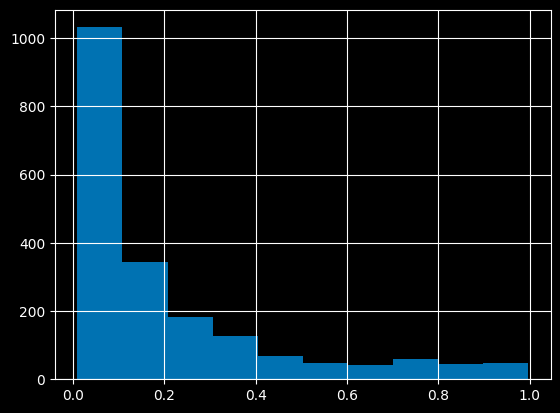

In [32]:
test.score_catboost.hist();

Только 20% склонны к оттоку

In [33]:
train.Exited.mean()

0.20366666666666666

Посмотрим на пользователей, вероятность оттока которых > 0.5
Для того, чтобы Pandas выдал нам 0 и 1, а не False и True, нужно умножить на 1

In [42]:
test['y_pred'] = (test['score_catboost'] > 0.5) * 1

In [47]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0


In [44]:
test.ypred.mean()

0.1225

In [41]:
from sklearn.metrics import confusion_matrix

#### Анализируя матрицу путаницы (ошибок) получаем:
В целом в большинстве случаев модель правильно определила отточных и неотточных клиентов.
1537 клиентов не было отточными и модель предсказала, что они не отточные TN - Верно
218 клиентов были отточные, а модель предскзала, что они не оттчные FN - ошибки
56 клиентов не были отточными, а модель предсказала, что они отточные FP - шибки
189 клиентов были отточными и модель также предсказала, что они отточные - Верно

In [48]:
confusion_matrix(test.Exited, test.y_pred)

array([[1537,   56],
       [ 218,  189]], dtype=int64)

In [49]:
tn, fp, fn, tp = confusion_matrix(test.Exited, test.y_pred).ravel()

In [50]:
tn, fp, fn, tp

(1537, 56, 218, 189)

## Recall (полнота)
recall - процент 1-иц, которые модель определила как 1-цы
На сколько хорошо модель может подстветить отточного клиента (в задаче оттока)

In [51]:
recall = tp / (tp + fn)

In [52]:
recall

0.4643734643734644

Рекол = 0.46 или 46%. То есть если мы покажем модели 100 отточных клиентов, то она распознает только 46

In [53]:
from sklearn.metrics import recall_score

In [54]:
recall_score(test.Exited, test.y_pred)

0.4643734643734644

## Precision (точность)
Показывает ПРОЦЕНТ ПРАВИЛЬНЫХ 1-иц, среди всех предсказанных 1-иц.

In [55]:
precision = tp / (tp + fp)

In [56]:
precision

0.7714285714285715

In [57]:
from sklearn.metrics import precision_score

In [58]:
precision_score(test.Exited, test.y_pred)

0.7714285714285715